In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [80]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 14,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})
plt.rcParams['xtick.labelsize']=12

In [81]:
map_key = "map_50"

In [82]:
# df_tensor_jpeg_map = pd.read_csv("../measurements/tensor_jpeg_large/map.csv")
# df_tensor_jpeg_time = pd.read_csv("../measurements/tensor_jpeg_large/time.csv")

# df_frame_jpeg_map = pd.read_csv("../measurements/frame_jpeg_large/map.csv")
# df_frame_jpeg_time = pd.read_csv("../measurements/frame_jpeg_large/time.csv")

# df_tensor_direct_jpeg_map = pd.read_csv("../measurements/tensor_direct_jpeg_large/map.csv")
# df_tensor_direct_jpeg_time = pd.read_csv("../measurements/tensor_direct_jpeg_large/time.csv")

# df_tensor_ml_map = pd.read_csv("../measurements/tensor_ml_large/map.csv")
# df_tensor_ml_time = pd.read_csv("../measurements/tensor_ml_large/time.csv")

# df_frame_local_map = pd.read_csv("../measurements/frame_local_large/map.csv")
# df_frame_local_time = pd.read_csv("../measurements/frame_local_large/time.csv")

df_tensor_jpeg_map = pd.read_csv("../measurements/tensor_jpeg_v2/map.csv")
df_tensor_jpeg_time = pd.read_csv("../measurements/tensor_jpeg_v2/time.csv")

df_frame_jpeg_map = pd.read_csv("../measurements/frame_jpeg/map.csv")
df_frame_jpeg_time = pd.read_csv("../measurements/frame_jpeg/time.csv")

df_tensor_ml_map = pd.read_csv("../measurements/tensor_ml/map.csv")
df_tensor_ml_time = pd.read_csv("../measurements/tensor_ml/time.csv")

df_tensor_direct_jpeg_map = pd.read_csv("../measurements/tensor_direct_jpeg/map.csv")
df_tensor_direct_jpeg_time = pd.read_csv("../measurements/tensor_direct_jpeg/time.csv")

df_frame_local_map = pd.read_csv("../measurements/frame_local/map.csv")
df_frame_local_time = pd.read_csv("../measurements/frame_local/time.csv")


## Map

In [83]:
tensor_jpeg_map_mean =[]
tensor_jpeg_map_std = []
jpeg_groups=df_tensor_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_map_mean.append(dfg[map_key].mean()*100)
    tensor_jpeg_map_std.append(dfg[map_key].std()*100)
tensor_jpeg_map_mean = np.array(tensor_jpeg_map_mean)
tensor_jpeg_map_std = np.array(tensor_jpeg_map_std)

In [84]:
tensor_direct_jpeg_map_mean =[]
tensor_direct_jpeg_map_std = []
direct_jpeg_groups=df_tensor_direct_jpeg_map.groupby("jepg_quality")
for key in direct_jpeg_groups.groups.keys():
    dfg = direct_jpeg_groups.get_group(key)
    tensor_direct_jpeg_map_mean.append(dfg[map_key].mean()*100)
    tensor_direct_jpeg_map_std.append(dfg[map_key].std()*100)
tensor_direct_jpeg_map_mean = np.array(tensor_direct_jpeg_map_mean)
tensor_direct_jpeg_map_std = np.array(tensor_direct_jpeg_map_std)

In [85]:
frame_jpeg_map_mean =[]
frame_jpeg_map_std = []
jpeg_groups=df_frame_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_map_mean.append(dfg[map_key].mean()*100)
    frame_jpeg_map_std.append(dfg[map_key].std()*100)
frame_jpeg_map_mean = np.array(frame_jpeg_map_mean)
frame_jpeg_map_std = np.array(frame_jpeg_map_std)

In [86]:
tensor_ml_map_mean =[]
tensor_ml_map_std = []
jpeg_groups=df_tensor_ml_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_ml_map_mean.append(dfg[map_key].mean()*100)
    tensor_ml_map_std.append(dfg[map_key].std()*100)
tensor_ml_map_mean = np.array(tensor_ml_map_mean)
tensor_ml_map_std = np.array(tensor_ml_map_std)

## Data size

In [87]:
tensor_jpeg_datasize_mean =[]
tensor_jpeg_datasize_std = []
jpeg_groups=df_tensor_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_datasize_mean.append(dfg["data_size_mean"].mean()/1e3)
    tensor_jpeg_datasize_std.append(dfg["data_size_std"].mean()/1e3)
tensor_jpeg_datasize_mean =np.array(tensor_jpeg_datasize_mean)
tensor_jpeg_datasize_std = np.array(tensor_jpeg_datasize_std)

In [88]:
tensor_direct_jpeg_datasize_mean =[]
tensor_direct_jpeg_datasize_std = []
direct_jpeg_groups=df_tensor_direct_jpeg_map.groupby("jepg_quality")
for key in direct_jpeg_groups.groups.keys():
    dfg = direct_jpeg_groups.get_group(key)
    tensor_direct_jpeg_datasize_mean.append(dfg["data_size_mean"].mean()/1e3)
    tensor_direct_jpeg_datasize_std.append(dfg["data_size_std"].mean()/1e3)
tensor_direct_jpeg_datasize_mean =np.array(tensor_direct_jpeg_datasize_mean)
tensor_direct_jpeg_datasize_std = np.array(tensor_direct_jpeg_datasize_std)

In [89]:
frame_jpeg_datasize_mean =[]
frame_jpeg_datasize_std = []
jpeg_groups=df_frame_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_datasize_mean.append(dfg["data_size_mean"].mean()/1e3)
    frame_jpeg_datasize_std.append(dfg["data_size_std"].mean()/1e3)
frame_jpeg_datasize_mean =np.array(frame_jpeg_datasize_mean)
frame_jpeg_datasize_std = np.array(frame_jpeg_datasize_std)

In [90]:
tensor_ml_datasize_mean =[]
tensor_ml_datasize_std = []
ml_groups=df_tensor_ml_map.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_datasize_mean.append(dfg["data_size_mean"].mean()/1e3)
    tensor_ml_datasize_std.append(dfg["data_size_std"].mean()/1e3)
tensor_ml_datasize_mean =np.array(tensor_ml_datasize_mean)
tensor_ml_datasize_std = np.array(tensor_ml_datasize_std)

## Time

In [91]:
tensor_jpeg_elapsed_mean =[]
tensor_jpeg_network_mean = []
tensor_jpeg_head_mean = []
tensor_jpeg_tail_mean = []
tensor_jpeg_encode_mean = []
tensor_jpeg_decode_mean = []
jpeg_groups=df_tensor_jpeg_time.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_elapsed_mean.append(dfg["head_time_mean"].mean()+dfg["encode_time_mean"].mean()+dfg["request_time_mean"].mean())
    tensor_jpeg_network_mean.append(dfg["request_time_mean"].mean()-dfg["decode_time_mean"].mean()-dfg["tail_time_mean"].mean())
    tensor_jpeg_head_mean.append(dfg["head_time_mean"].mean())
    tensor_jpeg_tail_mean.append(dfg["tail_time_mean"].mean())
    tensor_jpeg_encode_mean.append(dfg["encode_time_mean"].mean()-1.5)
    tensor_jpeg_decode_mean.append(dfg["decode_time_mean"].mean())
tensor_jpeg_elapsed_mean =np.array(tensor_jpeg_elapsed_mean)
tensor_jpeg_network_mean = np.array(tensor_jpeg_network_mean)
tensor_jpeg_head_mean = np.array(tensor_jpeg_head_mean)
tensor_jpeg_tail_mean = np.array(tensor_jpeg_tail_mean)
tensor_jpeg_encode_mean = np.array(tensor_jpeg_encode_mean)
tensor_jpeg_decode_mean =  np.array(tensor_jpeg_decode_mean)

In [92]:
tensor_direct_jpeg_elapsed_mean =[]
tensor_direct_jpeg_network_mean = []
tensor_direct_jpeg_head_mean = []
tensor_direct_jpeg_tail_mean = []
tensor_direct_jpeg_encode_mean = []
tensor_direct_jpeg_decode_mean = []
direct_jpeg_groups=df_tensor_direct_jpeg_time.groupby("jepg_quality")
for key in direct_jpeg_groups.groups.keys():
    dfg = direct_jpeg_groups.get_group(key)
    tensor_direct_jpeg_elapsed_mean.append(dfg["head_time_mean"].mean()+dfg["encode_time_mean"].mean()+dfg["request_time_mean"].mean())
    tensor_direct_jpeg_network_mean.append(dfg["request_time_mean"].mean()-dfg["decode_time_mean"].mean()-dfg["tail_time_mean"].mean())
    tensor_direct_jpeg_head_mean.append(dfg["head_time_mean"].mean())
    tensor_direct_jpeg_tail_mean.append(dfg["tail_time_mean"].mean())
    tensor_direct_jpeg_encode_mean.append(dfg["encode_time_mean"].mean())
    tensor_direct_jpeg_decode_mean.append(dfg["decode_time_mean"].mean())
tensor_direct_jpeg_elapsed_mean =np.array(tensor_direct_jpeg_elapsed_mean)
tensor_direct_jpeg_network_mean = np.array(tensor_direct_jpeg_network_mean)
tensor_direct_jpeg_head_mean = np.array(tensor_direct_jpeg_head_mean)
tensor_direct_jpeg_tail_mean = np.array(tensor_direct_jpeg_tail_mean)
tensor_direct_jpeg_encode_mean = np.array(tensor_direct_jpeg_encode_mean)
tensor_direct_jpeg_decode_mean = np.array(tensor_direct_jpeg_decode_mean)

In [93]:
frame_jpeg_elapsed_mean =[]
frame_jpeg_network_mean = []
frame_jpeg_model_mean = []
frame_jpeg_encode_mean = []
frame_jpeg_decode_mean = []
jpeg_groups=df_frame_jpeg_time.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    frame_jpeg_elapsed_mean.append(dfg["encode_time_mean"].mean()+dfg["request_time_mean"].mean())
    frame_jpeg_network_mean.append(dfg["request_time_mean"].mean()-dfg["decode_time_mean"].mean()-dfg["model_time_mean"].mean())
    frame_jpeg_model_mean.append(dfg["model_time_mean"].mean())
    frame_jpeg_encode_mean.append(dfg["encode_time_mean"].mean())
    frame_jpeg_decode_mean.append(dfg["decode_time_mean"].mean())
frame_jpeg_elapsed_mean =np.array(frame_jpeg_elapsed_mean)
frame_jpeg_network_mean = np.array(frame_jpeg_network_mean)
frame_jpeg_model_mean = np.array(frame_jpeg_model_mean)
frame_jpeg_encode_mean = np.array(frame_jpeg_encode_mean)
frame_jpeg_decode_mean = np.array(frame_jpeg_decode_mean)

In [94]:
tensor_ml_elapsed_mean =[]
tensor_ml_network_mean = []
tensor_ml_head_mean = []
tensor_ml_tail_mean = []
tensor_ml_encode_mean = []
tensor_ml_decode_mean = []
ml_groups=df_tensor_ml_time.groupby("jepg_quality")
for key in ml_groups.groups.keys():
    dfg = ml_groups.get_group(key)
    tensor_ml_elapsed_mean.append(dfg["head_time_mean"].mean()+dfg["encode_time_mean"].mean()+dfg["request_time_mean"].mean())
    tensor_ml_network_mean.append(dfg["request_time_mean"].mean()-dfg["decode_time_mean"].mean()-dfg["tail_time_mean"].mean())
    tensor_ml_head_mean.append(dfg["head_time_mean"].mean())
    tensor_ml_tail_mean.append(dfg["tail_time_mean"].mean())
    tensor_ml_encode_mean.append(dfg["encode_time_mean"].mean()-1.5)
    tensor_ml_decode_mean.append(dfg["decode_time_mean"].mean()-1.5)
tensor_ml_elapsed_mean =np.array(tensor_ml_elapsed_mean)
tensor_ml_network_mean = np.array(tensor_ml_network_mean)
tensor_ml_head_mean = np.array(tensor_ml_head_mean)
tensor_ml_tail_mean = np.array(tensor_ml_tail_mean)
tensor_ml_encode_mean = np.array(tensor_ml_encode_mean)
tensor_ml_decode_mean = np.array(tensor_ml_decode_mean)

## Plots

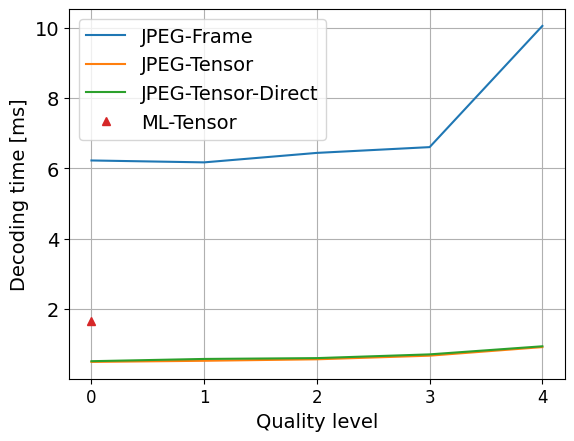

In [95]:
plt.figure()
x_real = np.arange(5)

plt.plot(x_real, frame_jpeg_decode_mean, label="JPEG-Frame")
plt.plot(x_real, tensor_jpeg_decode_mean, label="JPEG-Tensor")
plt.plot(x_real, tensor_direct_jpeg_decode_mean, label="JPEG-Tensor-Direct")
plt.plot(0,tensor_ml_decode_mean, "^",label="ML-Tensor")
plt.xticks(x_real,x_real)
plt.xlabel("Quality level")
plt.ylabel("Decoding time [ms]")
plt.grid()
plt.legend()

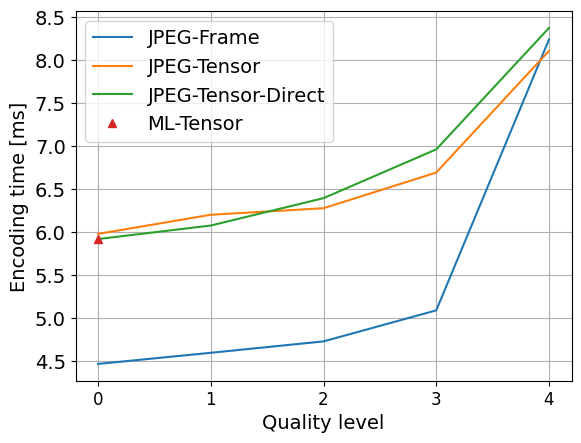

In [96]:
plt.figure()
x_real = np.arange(5)

plt.plot(x_real, frame_jpeg_encode_mean, label="JPEG-Frame")
plt.plot(x_real, tensor_jpeg_encode_mean, label="JPEG-Tensor")
plt.plot(x_real, tensor_direct_jpeg_encode_mean, label="JPEG-Tensor-Direct")
plt.plot(0,tensor_ml_encode_mean, "^",label="ML-Tensor")
plt.xticks(x_real,x_real)
plt.xlabel("Quality level")
plt.ylabel("Encoding time [ms]")
plt.grid()
plt.legend()

In [97]:
# species = ('JPEG-Frame', 'JPEG-Tensor-Direct', 'JPEG-Tensor', "ML-Tensor")
# sex_counts = {
#     'On Mobile': np.array([frame_jpeg_encode_mean.mean(),tensor_direct_jpeg_encode_mean.mean(),tensor_jpeg_encode_mean.mean(),tensor_ml_encode_mean.mean()]),
#     # 'On Edge': np.array([0,tensor_jpeg_tail_mean.mean() , frame_jpeg_model_mean.mean()]),
# }
# width = 0.6  # the width of the bars: can also be len(x) sequence


# fig, ax = plt.subplots()
# bottom = np.zeros(4)

# for sex, sex_count in sex_counts.items():
#     # p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
#     bottom += sex_count

#     ax.bar_label(p, label_type='center')

# # ax.set_title()
# ax.set_ylabel('DNN processing time [ms]')
# ax.legend()

# ax.set_ylim([0,30])
# plt.show()

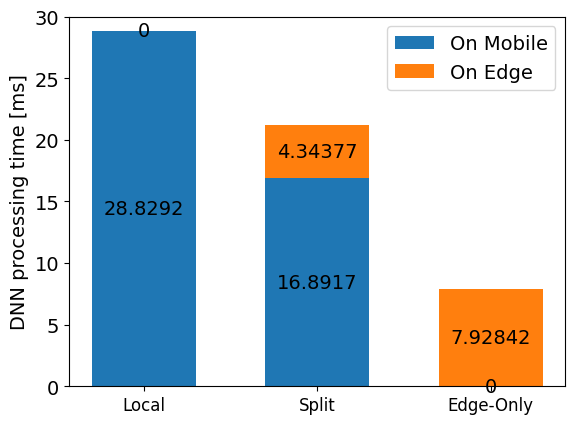

In [98]:
species = ('Local', 'Split', 'Edge-Only')
sex_counts = {
    'On Mobile': np.array([df_frame_local_time["model_time_mean"].mean(),tensor_jpeg_head_mean.mean() , 0]),
    'On Edge': np.array([0,tensor_jpeg_tail_mean.mean() , frame_jpeg_model_mean.mean()]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(species, sex_count, width, label=sex, bottom=bottom)
    bottom += sex_count

    ax.bar_label(p, label_type='center')

# ax.set_title()
ax.set_ylabel('DNN processing time [ms]')
ax.legend()

ax.set_ylim([0,30])
plt.show()

/tmp/ipykernel_462656/1651210833.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


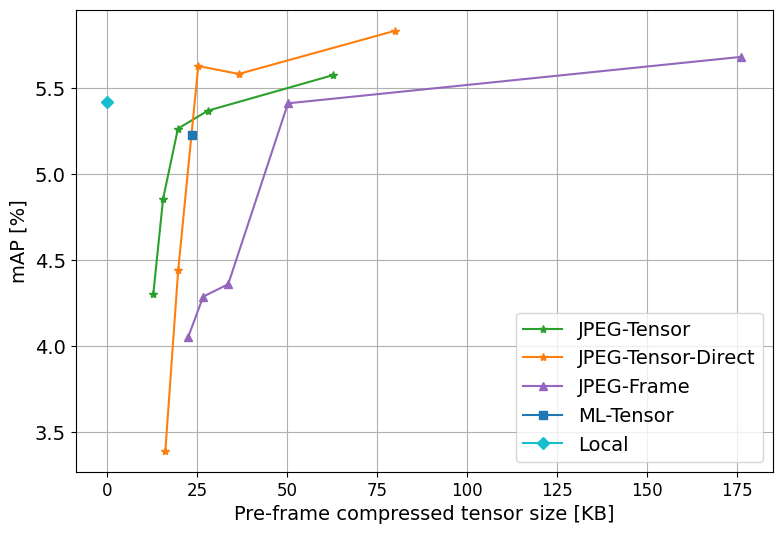

In [99]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)


ax1.plot(tensor_jpeg_datasize_mean,tensor_jpeg_map_mean, "*-", label="JPEG-Tensor"  ,color="tab:green" )
ax1.plot(tensor_direct_jpeg_datasize_mean,tensor_direct_jpeg_map_mean, "*-", label="JPEG-Tensor-Direct"  ,color="tab:orange" )
ax1.plot(frame_jpeg_datasize_mean,frame_jpeg_map_mean, "^-", label="JPEG-Frame"  ,color="tab:purple" )
ax1.plot(tensor_ml_datasize_mean,tensor_ml_map_mean, "s-", label="ML-Tensor"  ,color="tab:blue" )
ax1.plot(0,df_frame_local_map[map_key].mean()*100, "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("mAP [%]")
ax1.set_xlabel('Pre-frame compressed tensor size [KB]')
# ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
# ax1.set_yscale("log")
# ax1.set_ylim([1,500])
# plt.legend((p1[0], p2[0]), ('boys', 'girls'), loc= "lower center")
# lgd = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=3,columnspacing=0.7, fancybox=True, shadow=True)
ax1.grid()
fig.show()

/tmp/ipykernel_462656/81978785.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


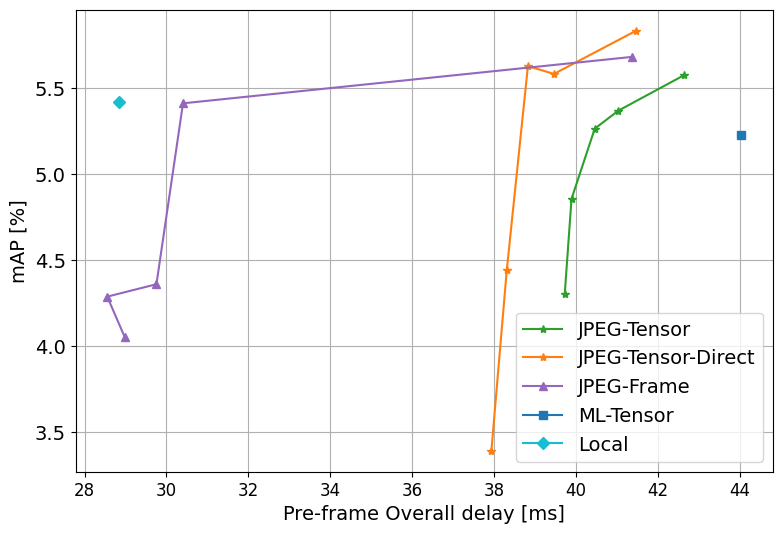

In [100]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)


ax1.plot(tensor_jpeg_elapsed_mean,tensor_jpeg_map_mean, "*-", label="JPEG-Tensor"  ,color="tab:green" )
ax1.plot(tensor_direct_jpeg_elapsed_mean,tensor_direct_jpeg_map_mean, "*-", label="JPEG-Tensor-Direct"  ,color="tab:orange" )
ax1.plot(frame_jpeg_elapsed_mean,frame_jpeg_map_mean, "^-", label="JPEG-Frame"  ,color="tab:purple" )
ax1.plot(tensor_ml_elapsed_mean,tensor_ml_map_mean, "s-", label="ML-Tensor"  ,color="tab:blue" )
ax1.plot(df_frame_local_time["model_time_mean"].mean(),df_frame_local_map[map_key].mean()*100, "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("mAP [%]")
ax1.set_xlabel('Pre-frame Overall delay [ms]')
# ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
# ax1.set_yscale("log")
# ax1.set_ylim([1,500])
# plt.legend((p1[0], p2[0]), ('boys', 'girls'), loc= "lower center")
# lgd = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=3,columnspacing=0.7, fancybox=True, shadow=True)
ax1.grid()
fig.show()